# ANÁLISIS EXPLORATORIO DE RELEVANCIA


El estudio previo de los datos o EDA es una etapa crítica en la ciencia de datos, y sin duda la que consume más tiempo.

El análisis está dividido en las siguientes secciones:

1. Comprender el problema
2. Estudio univariable
3. Estudio multivariable
4. Limpieza básica de los datos
5. Comprobación de suposiciones

# Cargando los datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [25]:
# Asigno los datos a un dataframe:

df_train = pd.read_csv('/content/drive/MyDrive/PatronesClass2022/Repositorio/patrones/entregas/usedcars.csv')
df_train.head(20)
#df_train.corr()
#print(df_train.shape)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,highway-mpg,price,city-L/100km,highway-L/100km,price_binned,diesel,gas,normalized_length,normalized_width,normalized_height
0,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,27,13495,11.190476,8.703704,Low,0,1,-0.438315,-0.851335,-2.029015
1,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,27,16500,11.190476,8.703704,Low,0,1,-0.438315,-0.851335,-2.029015
2,1,NaN,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,26,16500,12.368421,9.038462,Low,0,1,-0.243544,-0.185134,-0.558319
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,176.6,...,30,13950,9.791667,7.833333,Low,0,1,0.194690,0.147966,0.217881
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,176.6,...,22,17450,13.055556,10.681818,Low,0,1,0.194690,0.243137,0.217881
5,2,NaN,audi,std,two,sedan,fwd,front,99.8,177.3,...,25,15250,12.368421,9.400000,Low,0,1,0.251498,0.195551,-0.272351
6,1,158.0,audi,std,four,sedan,fwd,front,105.8,192.7,...,25,17710,12.368421,9.400000,Low,0,1,1.501278,2.622423,0.789818
7,1,NaN,audi,std,four,wagon,fwd,front,105.8,192.7,...,25,18920,12.368421,9.400000,Median,0,1,1.501278,2.622423,0.789818
8,1,158.0,audi,turbo,four,sedan,fwd,front,105.8,192.7,...,20,23875,13.823529,11.750000,Median,0,1,1.501278,2.622423,0.871523
9,2,192.0,bmw,std,two,sedan,rwd,front,101.2,176.8,...,29,16430,10.217391,8.103448,Low,0,1,0.210921,-0.518235,0.217881


In [4]:
# Echo un vistazo las columnas:

df_train.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'price_binned', 'diesel', 'gas',
       'normalized_length', 'normalized_width', 'normalized_height'],
      dtype='object')

# 1. El problema

variable a analizar:
- Price : precio
- symboling : simbolo de riesgo del vehiculo segun su precio
- normalized-losses : perdidas normalizadas (pago de perdida promedio relativo por año asegurado)
- make : marca que hizo el carro
- Aspiration : si tiene turbo o es estandar
- num of doors :  cuantas puertas tiene el vehiculo
- body Style : tipo de vehiculo
- drive wheels : tipo de rines
- engine location : lugar donde se ubica el motor
- wheel base : distancia entre el  eje central y las ruedas
- length : tamaño
- widht : ancho
- height : alto
- curb weight : tamaño total del vehiculo in cluyendo full tank de gasolina o el equipamiento estandar
- engine type :  tipo de motor
- num of cylinders :  número de cilindros
- engine size : tamaño de mootor
-  fuel system :  sistema de combustible
-  bore : diametro de cada cilindro
- stroke :  el recorrido completo del piston mediante el cilindro en cada dirección
- compression ratio : radio entre el volumen del cilindro y la combustión
- horse power : caballos de fuerza
- peak rpm : maximo rpm
- city mpg : millas por galon en ciudad
- highway : millas por glaon en carretera
- city-L/100km : litros por 100km en ciudad
- highway-L/100km : litros por 100km en carretera
- price binned : precio agrupado
- diesel
- gas
- normalized_length
- normalized_width
- normalized_height

# 2. Análisis univariable: Price

In [9]:
# Resumen de estadística descriptiva:

df_train['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

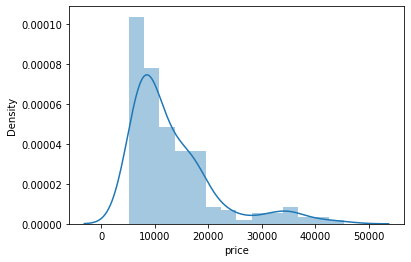

In [10]:
# Histograma:

sns.distplot(df_train['price']);

A simple vista se pueden apreciar:

- Una desviación con respecto a la distribución normal.
- Una asimetría positiva.
- Tiene un pico muy determinado y los demas son graduales con otro pequeño pico dirigido a tendencias mas bajas.
- También se puede decir que es una curtosis leptocurtica, los valore tienen una tendencia mas grande a su media 



In [11]:
# Asimetría y curtosis:

print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())

Skewness: 1.809675
Kurtosis: 3.231537


### Relación con variables numéricas

En comparación con las dos primeras variables que decidi tomar como caso de evaluación, que personalmente creo que son muy lógicas.

Se determina un grupo bastante claro entre los precios mas altos de los vehiculos (al rededor de los 40000-45000) y la menor cantidad de millas(0-15)

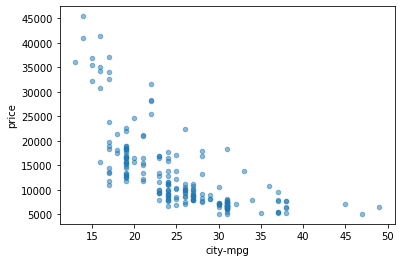

In [17]:

var = 'city-mpg'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', alpha = 0.5);

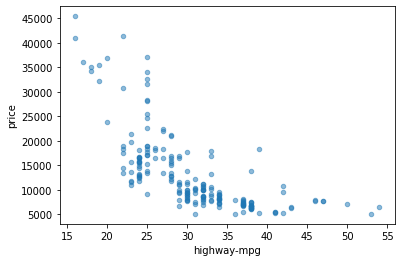

In [14]:

var = 'highway-mpg'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', alpha = 0.5);

Por otro lado las otras tres variables que elegí fueron el tamaño, el ancho y el alto del vehiculo.

se puede observar que tienen una correlación positiva en cuanto al precio, pero con la particularidad de que la variable de altura esta moderadamente correlacionada con el precio

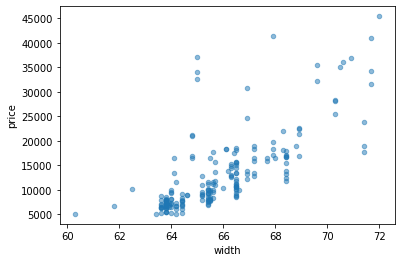

In [19]:
var = 'width'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', alpha = 0.5);

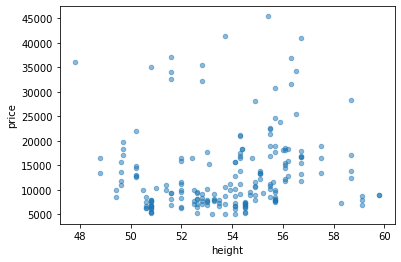

In [20]:
var = 'height'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', alpha = 0.5);

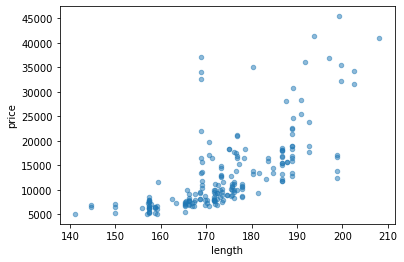

In [21]:
var = 'length'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', alpha = 0.5);

Por ultimo, el tamaño de la maquina es el mas relacionado con la variable del precio, también es apreciable con la matriz de correlación

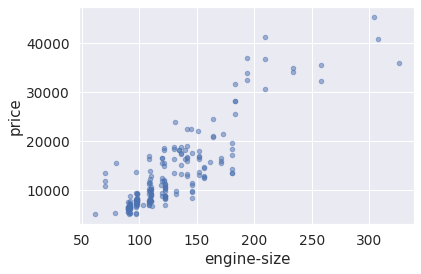

In [40]:
var = 'engine-size'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', alpha = 0.5);

### Relación con variables categóricas

En cuanto al boxplot para las variables categoricas escogi tres significantes el número de puertas que tenga el vehiculo, la marca, la aspiración (turbo o estandar).

En cuanto al número de puertas en relación al precio podemos ver una pequeña tendencia a tener un precio mas elevado en vehiculos con cuatro puertas

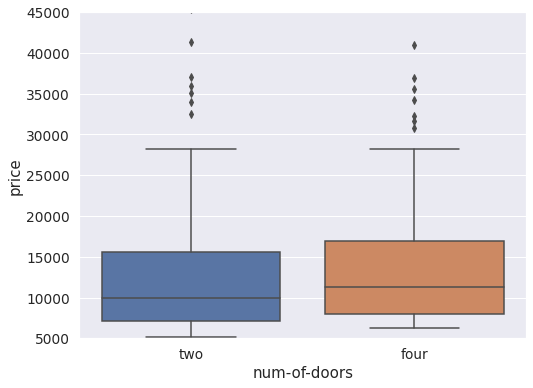

In [46]:
var = 'num-of-doors'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=5000, ymax=45000);

La marca aunque es mas disperso hay dos exponentes que tienen mas tendencia en los datos  BMW y Mercedes Benz, Benz con precios mas altos que los demas.

esto puede depender de otras variables asi que en cuanto al precio, en comparación no es una muy buena correlación, pero considero que es por que es una variable que depende de otras como el tipo de vehiculo que es, los caballos de fuerza, si es estandar o con turbo, entre otras. 

cuando vimos los precios de las casas según los años el tiempo era la variable independiente y el precio la dependiente, con esto de las marcas se pueden evaluar muchas cosas mas de los vehiculos de cada marca antes de evaluar concretamente la correlación con el precio.

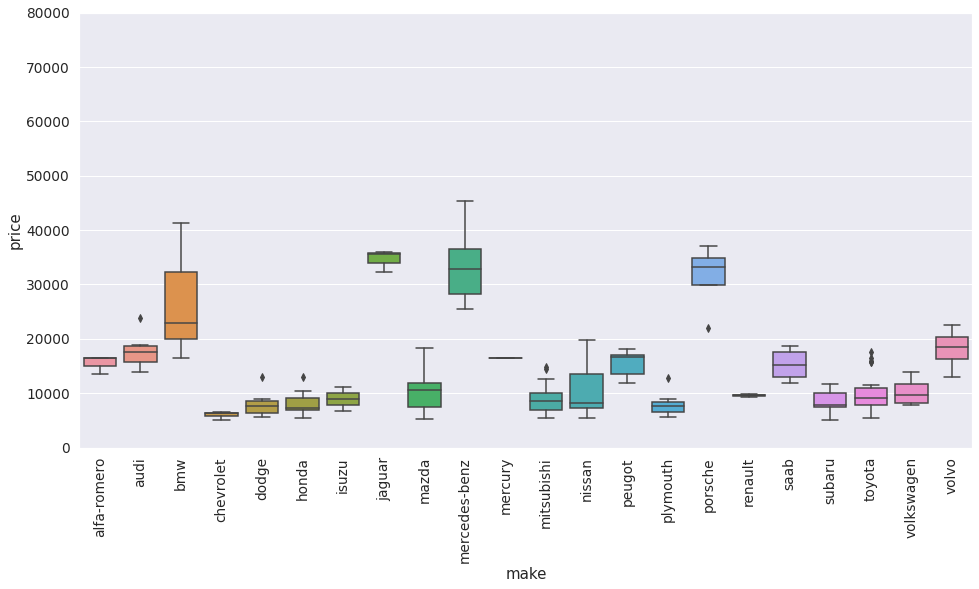

In [47]:
var = 'make'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=80000);
plt.xticks(rotation=90);

En cuanto a la aspiración me parece bien y se puede determinar que hay unos precios mas altos en los vehiculos que tienen turbo, que es normal aunque sean usados.

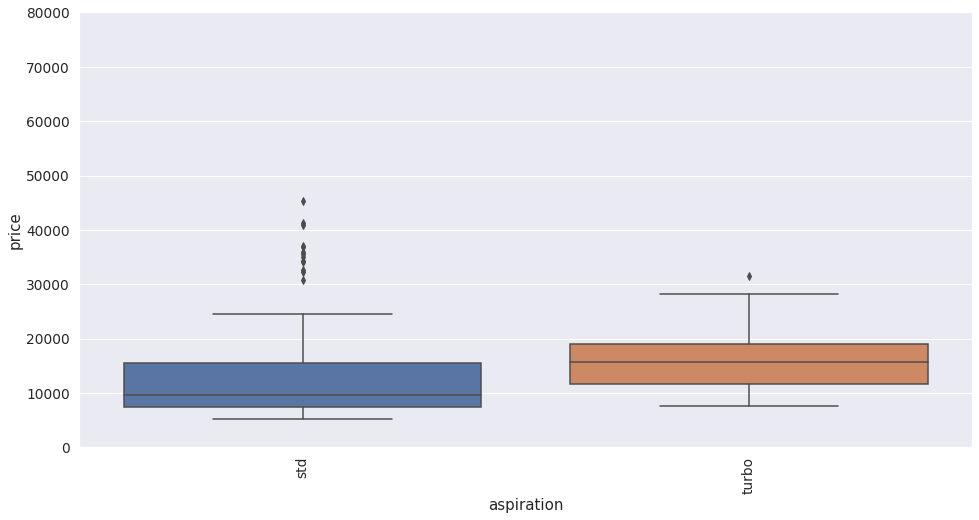

In [49]:
var = 'aspiration'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=80000);
plt.xticks(rotation=90);

#### Matriz de correlación (en forma de mapa de calor)

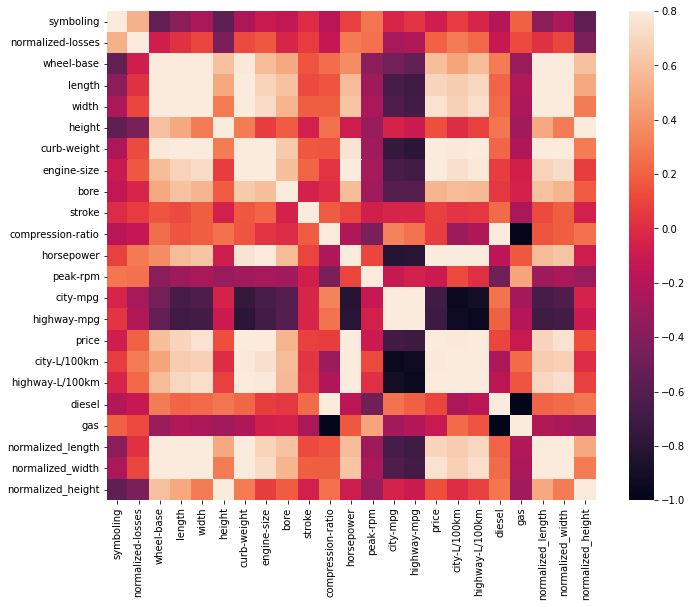

In [34]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#### Matriz de correlación de 'price'

En este caso mi planteamiento oes enfocado en las tres primeras variables que tienen una correlación superior a 0.8 y es bastante considerable por que son puntos de bastante valor para determinar el precio de un vehiculo, creeria yo que debido a eso es tan grande su correlación

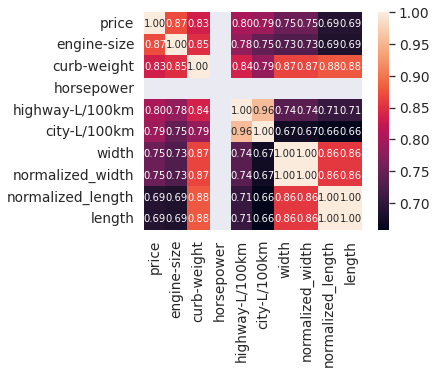

In [45]:
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [36]:
corr = df_train.corr()
corr[['price']].sort_values(by = 'price',ascending = False).style.background_gradient()

,price
price,1.000000
engine-size,0.872335
curb-weight,0.834415
horsepower,0.810533
highway-L/100km,0.801118
city-L/100km,0.789898
width,0.751265
normalized_width,0.751265
normalized_length,0.690628
length,0.690628


#### Diagramas de dispersión entre 'price' y sus variables correladas

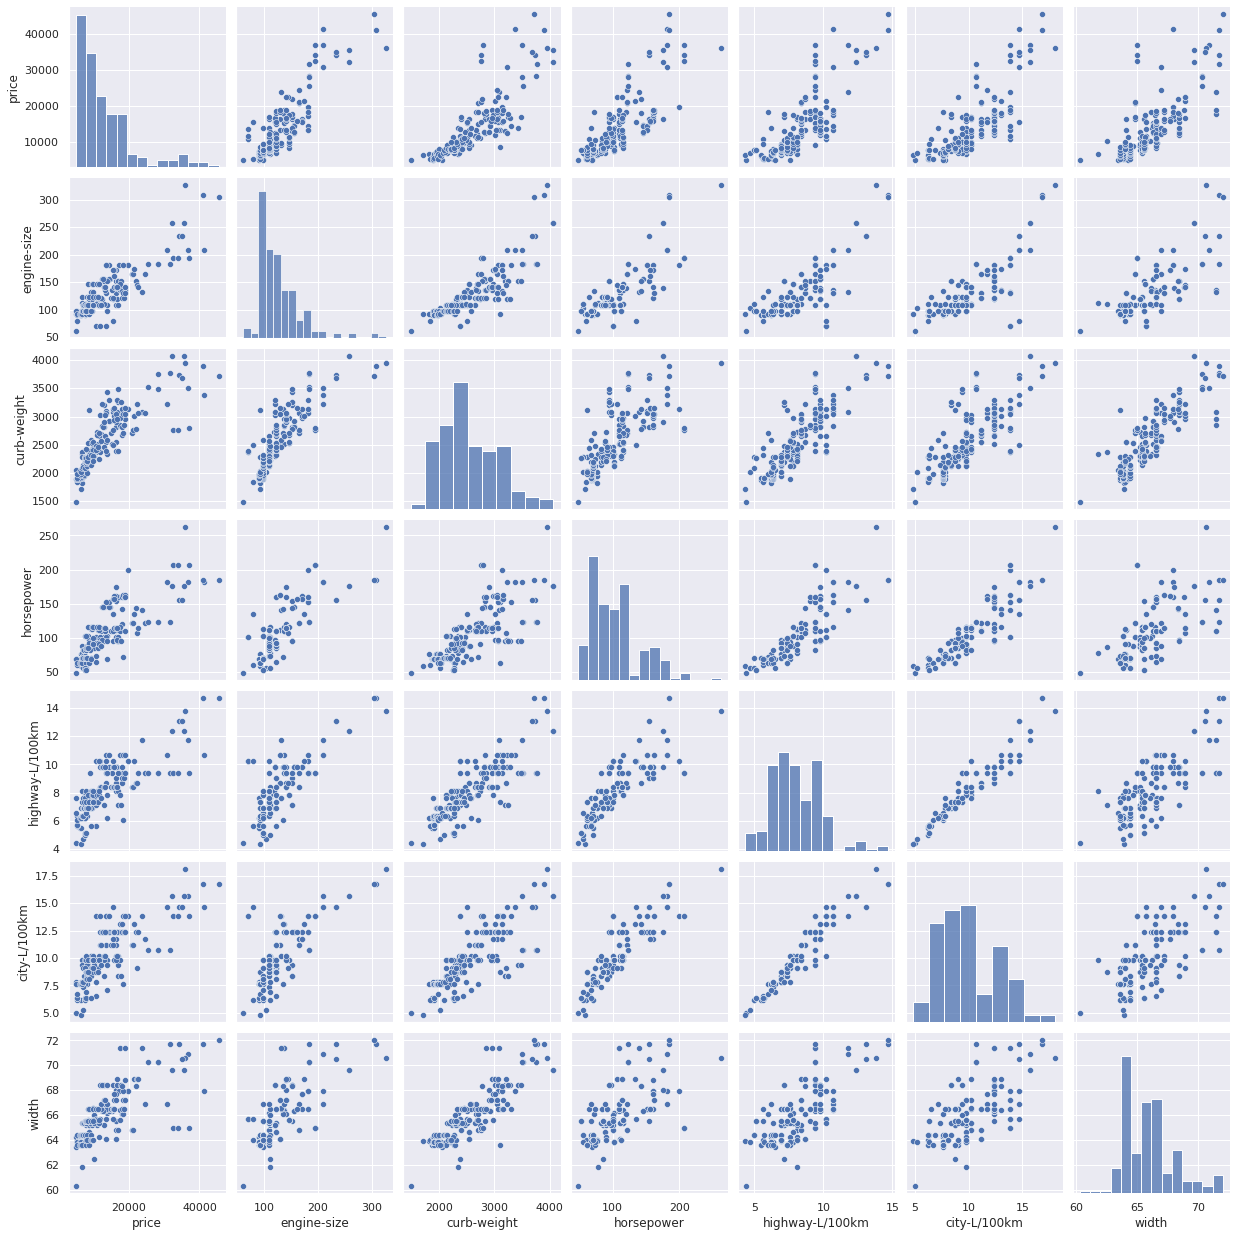

In [51]:
# Scatter plot:

sns.set()
cols = ['price', 'engine-size', 'curb-weight', 'horsepower', 'highway-L/100km', 'city-L/100km','width']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Por ultimo segun la matriz de correlación multivariable, mis variables que escogería o que considero mas importantes son las tres que mas correlación tienen en este caso, mas que todo es por la sinergía que puede dar.

Me refiero sobre todo a que se aseguran muchas cosas, por ejemplo, como el que no pasen cosas similares a lo de la variable 'make' que es muy dispersa en cuanto a depender de otras variables para determinar un precio.

al final engine-size, curb-weight y horsepower son cosas fundamentales de cara a determinar el valor de un vehiculo y pueden dar buenos resultados en precisión para hablar de un modelo que de una predicción de dicho precio por ejemplo.

